## Modelagem de absorvedores de placas perfuradas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from macroscopic_models import delany_bazley, jca

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [10]:
# define frequency space
f_start = 20
f_end = 4000
f = np.arange(f_start, f_end, step=1)
omega = 2 * np.pi * f

# air properties
rho0 = 1.21  # [kg/m³] air density
c0 = 343  # [m/s] sound speed
k0 = omega / c0 # [rad / m] wave number
air_viscosity = 1.84e-5

### 1. Variação da razão de área perfurada

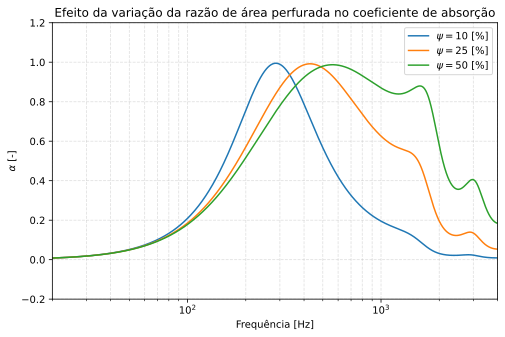

In [12]:
# perforated panel properties
a = 2.5e-3 # [m] aperture radius
l = 0.025 # [m] thickness of the perforated panel
D = 0.10 # [m] total absorber size
l_corr = l + 1.7*a # [m] corrected lenght of the tube
perforated_area_ratios = np.array([0.1, 0.25, 0.5])
panel_surface_densities = rho0*l_corr / perforated_area_ratios

# porous material properties
d = 0.04 # [m] thickness of porous layer
sigma = 20000  # [N*s/m^4] flux resistivity
# porous material characteristic impedance and characteristic wave number
Zp, kp = jca(f, sigma, tortuosity=1.2, porosity=0.96, viscous_characteristic_length=1e-4)

# ressonance frequency
f_res = (c0 / 2*np.pi) * np.sqrt(perforated_area_ratios / (D * l_corr))

# plot setup
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title(r"Efeito da variação da razão de área perfurada no coeficiente de absorção")
ax.set_xlabel("Frequência [Hz]")
ax.set_ylabel(r"$\alpha$ [-]")
ax.set_xlim(f_start, f_end)
ax.set_ylim(-0.2, 1.2)
ax.grid(axis="both", which="both", linestyle="--", alpha=0.4)
labels = [r"$\psi = 10~\text{[%]}$", r"$\psi = 25~\text{[%]}$", r"$\psi = 50~\text{[%]}$"]

for (panel_surface_density, label) in zip(panel_surface_densities, labels):
    # panel impedance
    Zpp = 1j*omega*panel_surface_density

    # impedance on top of the air layer
    Zs_ar = (-1j*rho0*c0) / np.tan(k0*(D - d))

    # impedance on top of the porous layer
    Zsi = (((-1j*Zs_ar*Zp) / np.tan(kp*d)) + (Zp**2)) / (Zs_ar - (1j*Zp / np.tan(kp*d)))

    # total impedance
    Zs = Zpp + Zsi

    # reflection coefficient
    Vp = (Zs - (rho0 * c0)) / (Zs + (rho0 * c0))

    # absorption coefficient
    alpha = 1 - (abs(Vp)) ** 2 

    # plot
    ax.semilogx(f, alpha, label=label)

ax.legend()
plt.show()

### 2. Variação do volume da cavidade

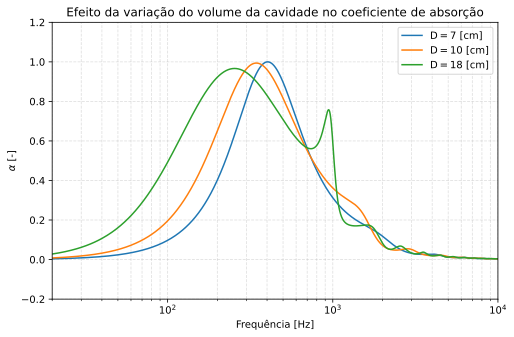

In [9]:
# perforated panel properties
a = 2.5e-3 # [m] aperture radius
l = 0.025 # [m] thickness of the perforated panel
cavity_lenghts = np.array([0.07, 0.10, 0.18]) # [m] total absorber size
l_corr = l + 1.7*a # [m] corrected lenght of the tube
perforated_area_ratio = 0.15
panel_surface_density = rho0*l_corr / perforated_area_ratio

# porous material properties
d = 0.04 # [m] thickness of porous layer
sigma = 20000  # [N*s/m^4] flux resistivity
# porous material characteristic impedance and characteristic wave number
Zp, kp = jca(f, sigma, tortuosity=1.2, porosity=0.96, viscous_characteristic_length=1e-4)

# ressonance frequency
f_res = (c0 / 2*np.pi) * np.sqrt(perforated_area_ratio / (D * l_corr))

# plot setup
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title(r"Efeito da variação do volume da cavidade no coeficiente de absorção")
ax.set_xlabel("Frequência [Hz]")
ax.set_ylabel(r"$\alpha$ [-]")
ax.set_xlim(f_start, f_end)
ax.set_ylim(-0.2, 1.2)
ax.grid(axis="both", which="both", linestyle="--", alpha=0.4)
labels = [r"$\text{D} = 7~\text{[cm]}$", r"$\text{D} = 10~\text{[cm]}$", r"$\text{D} = 18~\text{[cm]}$"]

for (D, label) in zip(cavity_lenghts, labels):
    # panel impedance
    Zpp = 1j*omega*panel_surface_density

    # impedance on top of the air layer
    Zs_ar = (-1j*rho0*c0) / np.tan(k0*(D - d))

    # impedance on top of the porous layer
    Zsi = (((-1j*Zs_ar*Zp) / np.tan(kp*d)) + (Zp**2)) / (Zs_ar - (1j*Zp / np.tan(kp*d)))

    # total impedance
    Zs = Zpp + Zsi

    # reflection coefficient
    Vp = (Zs - (rho0 * c0)) / (Zs + (rho0 * c0))

    # absorption coefficient
    alpha = 1 - (abs(Vp)) ** 2 

    # plot
    ax.semilogx(f, alpha, label=label)

ax.legend()
plt.show()

### 3. Variação da espessura da placa perfurada

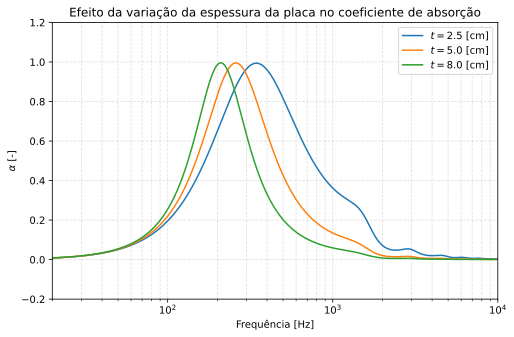

In [24]:
# perforated panel properties
a = 2.5e-3 # [m] aperture radius
D = 0.10 # [m] total absorber size
panel_thicknesses = np.array([0.025, 0.05, 0.08]) # [m] thickness of the perforated panel
l_corr = panel_thicknesses + 1.7*a # [m] corrected lenght of the tube
perforated_area_ratio = 0.15
panel_surface_densities = rho0*l_corr / perforated_area_ratio

# porous material properties
d = 0.04 # [m] thickness of porous layer
sigma = 20000  # [N*s/m^4] flux resistivity
# porous material characteristic impedance and characteristic wave number
Zp, kp = jca(f, sigma, tortuosity=1.2, porosity=0.96, viscous_characteristic_length=1e-4)

# ressonance frequency
f_res = (c0 / 2*np.pi) * np.sqrt(perforated_area_ratio / (D * l_corr))

# plot setup
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title(r"Efeito da variação da espessura da placa no coeficiente de absorção")
ax.set_xlabel("Frequência [Hz]")
ax.set_ylabel(r"$\alpha$ [-]")
ax.set_xlim(f_start, f_end)
ax.set_ylim(-0.2, 1.2)
ax.grid(axis="both", which="both", linestyle="--", alpha=0.4)
labels = [r"$t = 2.5~\text{[cm]}$", r"$t = 5.0~\text{[cm]}$", r"$t = 8.0~\text{[cm]}$"]

for (panel_surface_density, label) in zip(panel_surface_densities, labels):
    # panel impedance
    Zpp = 1j*omega*panel_surface_density

    # impedance on top of the air layer
    Zs_ar = (-1j*rho0*c0) / np.tan(k0*(D - d))

    # impedance on top of the porous layer
    Zsi = (((-1j*Zs_ar*Zp) / np.tan(kp*d)) + (Zp**2)) / (Zs_ar - (1j*Zp / np.tan(kp*d)))

    # total impedance
    Zs = Zpp + Zsi

    # reflection coefficient
    Vp = (Zs - (rho0 * c0)) / (Zs + (rho0 * c0))

    # absorption coefficient
    alpha = 1 - (abs(Vp)) ** 2 

    # plot
    ax.semilogx(f, alpha, label=label)

ax.legend()
plt.show()

### 4. Variação da posição do material absorvedor

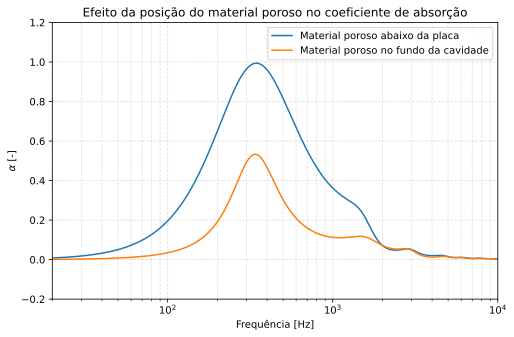

In [25]:
# perforated panel properties
a = 2.5e-3 # [m] aperture radius
l = 0.025 # [m] thickness of the perforated panel
D = 0.10 # [m] total absorber size
l_corr = l + 1.7*a # [m] corrected lenght of the tube
perforated_area_ratio = 0.15
panel_surface_density = rho0*l_corr / perforated_area_ratio

# porous material properties
d = 0.04 # [m] thickness of porous layer
sigma = 20000  # [N*s/m^4] flux resistivity
# porous material characteristic impedance and characteristic wave number
Zp, kp = jca(f, sigma, tortuosity=1.2, porosity=0.96, viscous_characteristic_length=1e-4)

# ressonance frequency
f_res = (c0 / 2*np.pi) * np.sqrt(perforated_area_ratio / (D * l_corr))

# plot setup
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title(r"Efeito da posição do material poroso no coeficiente de absorção")
ax.set_xlabel("Frequência [Hz]")
ax.set_ylabel(r"$\alpha$ [-]")
ax.set_xlim(f_start, f_end)
ax.set_ylim(-0.2, 1.2)
ax.grid(axis="both", which="both", linestyle="--", alpha=0.4)

# panel -> porous -> air
# panel impedance
Zpp = 1j*omega*panel_surface_density
# impedance on top of the air layer
Zs_ar = (-1j*rho0*c0) / np.tan(k0*(D - d))
# impedance on top of the porous layer
Zsi = (((-1j*Zs_ar*Zp) / np.tan(kp*d)) + (Zp**2)) / (Zs_ar - (1j*Zp / np.tan(kp*d)))
# total impedance
Zs = Zpp + Zsi
# reflection coefficient
Vp = (Zs - (rho0 * c0)) / (Zs + (rho0 * c0))
# absorption coefficient
alpha = 1 - (abs(Vp)) ** 2 
# plot
ax.semilogx(f, alpha, label="Material poroso abaixo da placa")


# panel -> air -> porous
# impedance on top of the porous layer
Zsp = -1j*Zp / np.tan(kp*d)
# impedance on top of the air layer
Zsi = (((-1j*Zsp*rho0*c0) / (np.tan(k0*(D - d)))) + (rho0*c0)**2) / (Zsp - ((1j*rho0*c0) / (np.tan(k0*(D - d)))))
# total impedance
Zs = Zpp + Zsi
# reflection coefficient
Vp = (Zs - (rho0 * c0)) / (Zs + (rho0 * c0))
# absorption coefficient
alpha = 1 - (abs(Vp)) ** 2 
# plot
ax.semilogx(f, alpha, label="Material poroso no fundo da cavidade")

ax.legend()
plt.show()

### 5. Placa ranhurada

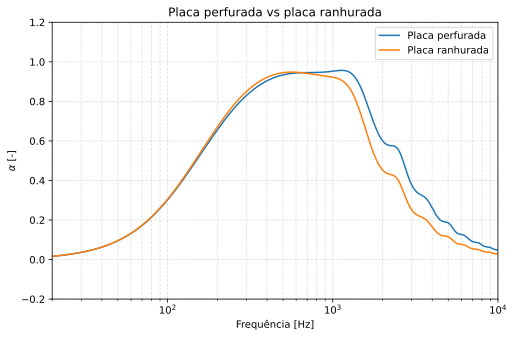

In [7]:
# perforated panel properties
a = 2.5e-3 # [m] aperture radius
l = 1e-3 # [m] thickness of the perforated panel
D = 0.12 # [m] total absorber size
l_corr = l + 1.7*a # [m] corrected lenght of the tube
perforated_area_ratio = 0.10
panel_surface_density = rho0*l_corr / perforated_area_ratio

# slotted panel properties
w = 5e-3 # [m] slit width
slotted_area_ratio = 0.10
slotted_l_corr = l + 2*w*(-1/np.pi)*np.log(np.sin(0.5*np.pi*slotted_area_ratio))
slotted_surface_density = rho0*slotted_l_corr / slotted_area_ratio

surface_densities = [panel_surface_density, slotted_surface_density]

# porous material properties
d = 0.06 # [m] thickness of porous layer
sigma = 20000  # [N*s/m^4] flux resistivity
# porous material characteristic impedance and characteristic wave number
Zp, kp = jca(f, sigma, tortuosity=1.2, porosity=0.96, viscous_characteristic_length=1e-4)

# ressonance frequency
f_res = (c0 / 2*np.pi) * np.sqrt(perforated_area_ratio / (D * l_corr))

# plot setup
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title(r"Placa perfurada vs placa ranhurada")
ax.set_xlabel("Frequência [Hz]")
ax.set_ylabel(r"$\alpha$ [-]")
ax.set_xlim(f_start, f_end)
ax.set_ylim(-0.2, 1.2)
ax.grid(axis="both", which="both", linestyle="--", alpha=0.4)
labels=["Placa perfurada", "Placa ranhurada"]

for (density, label) in zip(surface_densities, labels):
    # panel impedance
    Zpp = 1j*omega*density
    # impedance on top of the air layer
    Zs_ar = (-1j*rho0*c0) / np.tan(k0*(D - d))
    # impedance on top of the porous layer
    Zsi = (((-1j*Zs_ar*Zp) / np.tan(kp*d)) + (Zp**2)) / (Zs_ar - (1j*Zp / np.tan(kp*d)))
    # total impedance
    Zs = Zpp + Zsi
    # reflection coefficient
    Vp = (Zs - (rho0 * c0)) / (Zs + (rho0 * c0))
    # absorption coefficient
    alpha = 1 - (abs(Vp)) ** 2 
    # plot
    ax.semilogx(f, alpha, label=label)

ax.legend()
plt.show()